In [150]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = os.path.join("data/mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_df,mouse_drug_df,on="Mouse ID", how='left')

# Display the data table for preview

combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [151]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
avg_tumor = grouped_df.mean()

# Convert to DataFrame
avg_tumor = avg_tumor.reset_index()

# Preview DataFrame
avg_tumor.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [152]:
combined_data.count()

Mouse ID              1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
Drug                  1906
dtype: int64

In [153]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_stand_error = grouped_df.sem()
tumor_stand_error


# Convert to DataFrame
tumor_stand_error_df = pd.DataFrame(tumor_stand_error)


# Preview DataFrame
tumor_stand_error_df.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [154]:
tumor_stand_error.count()

100

In [155]:
# Minor Data Munging to Re-Format the Data Frames


pivot_table = avg_tumor.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


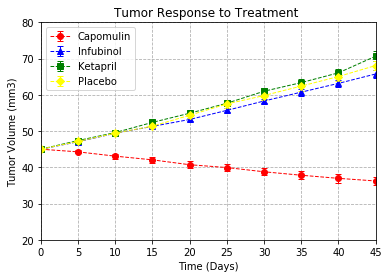

In [156]:
# Generate the Plot (with Error Bars)

# Max value for x and y and list of values
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45

error = tumor_stand_error_df["Tumor Volume (mm3)"]["Capomulin"]
cap = plt.errorbar(x_axis, pivot_table["Capomulin"], yerr=error, fmt="o", 
                   ls="dashed", linewidth=1, alpha=1, capsize=3,color="red")


error = tumor_stand_error_df["Tumor Volume (mm3)"]["Infubinol"]
infu = plt.errorbar(x_axis, pivot_table["Infubinol"], yerr=error, fmt="^", 
                   ls="dashed", linewidth=1, alpha=1, capsize=3,color="blue")


error = tumor_stand_error_df["Tumor Volume (mm3)"]["Ketapril"]
keta = plt.errorbar(x_axis, pivot_table["Ketapril"], yerr=error, fmt="s", 
                   ls="dashed", linewidth=1, alpha=1, capsize=3,color="green")

error = tumor_stand_error_df["Tumor Volume (mm3)"]["Placebo"]
plac = plt.errorbar(x_axis, pivot_table["Placebo"], yerr=error, fmt="D", 
                   ls="dashed", linewidth=1, alpha=1, capsize=3,color="yellow")


plt.ylim(20, 80)
plt.xlim(0, 45)
                        

plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
plt.show()
                                       
# Save the Figure
#plt.savefig(os.path.join('figures',Tumor_Response_During_Treatment.png))


In [157]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [158]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_grouped_df = combined_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
mean_met_grouped = met_grouped_df.mean()

# Convert to DataFrame
mean_met = mean_met_grouped.reset_index()

# Preview DataFrame
mean_met.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [159]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_stand_error = met_grouped_df.sem()

# Convert to DataFrame
met_stand_error_df = pd.DataFrame(met_stand_error)

# Preview DataFrame
met_stand_error_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [160]:
# Minor Data Munging to Re-Format the Data Frames
pivot_met_data = mean_met.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')


# Preview that Reformatting worked
pivot_met_data.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [161]:
# Generate the Plot (with Error Bars)
x_axis = [0,10,20,30,40,45]
x_limit = 45

error2 = mean_met["Metastatic Sites"]["Capomulin"]
cap2 = plt.errorbar(x_axis, pivot_met_data["Capomulin"], yerr=error, fmt="o", 
                   ls="dashed", linewidth=1, alpha=1, capsize=3,color="red")


error2 = mean_met["Metastatic Sites"]["Infubinol"]
infu2 = plt.errorbar(x_axis, pivot_met_data["Infubinol"], yerr=error, fmt="^", 
                   ls="dashed", linewidth=1, alpha=1, capsize=3,color="blue")


error2 = mean_met["Metastatic Sites"]["Ketapril"]
keta2 = plt.errorbar(x_axis, pivot_met_data["Ketapril"], yerr=error, fmt="s", 
                   ls="dashed", linewidth=1, alpha=1, capsize=3,color="green")

error2 = mean_met["Metastatic Sites"]["Placebo"]
plac2 = plt.errorbar(x_axis, pivot_met_data["Placebo"], yerr=error, fmt="D", 
                   ls="dashed", linewidth=1, alpha=1, capsize=3,color="yellow")


plt.ylim(0, 4)
plt.xlim(0, 45)
                        

plt.title("Metastatic Spread During Treatment ")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
plt.grid(linestyle="dashed")
plt.legend((cap2, infu2, keta2, plac2), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
plt.show()
# # Save the Figure

# # Show the Figure
# drug_format_list = ["red","blue","green","yellow"]

# for drug,marker,colors in drug_format_list:
#     ste = met_stand_error[drug]
#     met_treatment_plt = plt.errorbar(mean_met.index,mean_met[drug],ste, fmt = marker,
#                                      ls = '--',color=colors,linewidth=0.5)
    
# plt.title("Metastatic Spread During Treatment ")
# plt.xlabel("Treatment Duration (Days)")
# plt.ylabel("Met Sites")
# plt.grid(linestyle="dashed")
# plt.legend((cap2, infu2, keta2, plac2), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
# plt.show()
    

KeyError: 'Capomulin'

## Survival Rates

In [ ]:
# # Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_grouped_df = combined_data.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
mice = mouse_grouped_df.to_frame()
mice = mice.rename(columns={"Mouse ID": "Mouse Count"})
mice.head()



In [ ]:
# # Minor Data Munging to Re-Format the Data Frames

mice_plot = mice.unstack(0)
mice_df = mice_plot["Mouse Count"]
mice_df

ValueError: shape mismatch: objects cannot be broadcast to a single shape

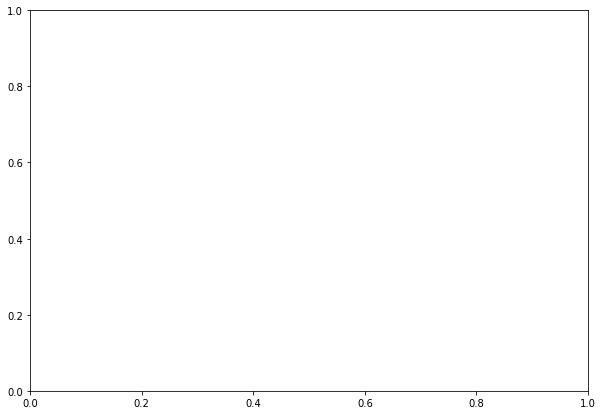

In [162]:
# Generate the Plot (Accounting for percentages)

cap3 = plt.errorbar(x_axis, (mice_df["Capomulin"]/25*100), fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "red")
infu3 = plt.errorbar(x_axis, (mice_df["Infubinol"]/25*100), fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "blue")
keta3 = plt.errorbar(x_axis, (mice_df["Ketapril"]/25*100),  fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")
plac3 = plt.errorbar(x_axis, (mice_df["Placebo"]/25*100),  fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="yellow")

plt.ylim(40, 100)
plt.xlim(0, 45)

plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()


# Save the Figure

# Show the Figure
plt.show()

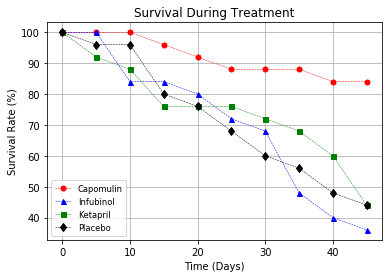

## Summary Bar Graph

In [165]:
# Calculate the percent changes for each drug
percent_change = ((pivot_table.iloc[-1])/(pivot_table.iloc[0])-1) * 100
percent_change

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

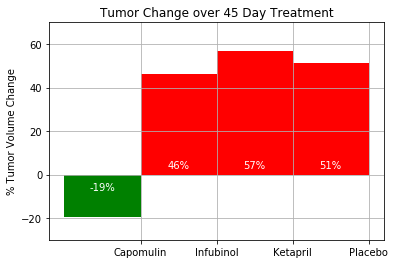

In [172]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs
passing = percent_change < 0


# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
change_list = [(percent_change[durg])for durg in drug_list]
change_plt = plt.bar(drug_list, change_list, width= -1, align='edge',
                    color=passing.map({True:'g',False:'r'}))

plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title("Tumor Change over 45 Day Treatment")


# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%', color='white',
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure


# Show the Figure
#fig.show()

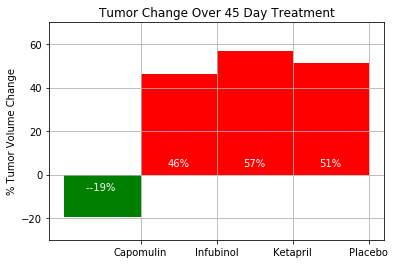